<a href="https://colab.research.google.com/github/eshita-3104/DSDBAL/blob/main/pract2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
def DetectOutlier(df,var):
  Q1 = df[var].quantile(0.25)
  Q3 = df[var].quantile(0.75)

  IQR = Q3 - Q1

  high = Q3 + 1.5*IQR
  low = Q1 - 1.5*IQR
  print("Highest allowed in variable:", var, high)
  print("lowest allowed in variable:", var, low)


  count = df[(df[var]>high) | (df[var]<low)][var].count()

  outliers = df[((df[var] < low) | (df[var] > high))]
  print('Outliers : \n', len(outliers))


  df_new = df[((df[var] >= low) & (df[var] <= high))]
  return(df_new)


In [18]:
df = pd.read_csv('/content/sample_data/academic.csv')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    478 non-null    object 
 1   NationalITy               480 non-null    object 
 2   PlaceofBirth              480 non-null    object 
 3   StageID                   480 non-null    object 
 4   GradeID                   480 non-null    object 
 5   SectionID                 480 non-null    object 
 6   Topic                     480 non-null    object 
 7   Semester                  480 non-null    object 
 8   Relation                  480 non-null    object 
 9   raisedhands               478 non-null    float64
 10  VisITedResources          480 non-null    int64  
 11  AnnouncementsView         480 non-null    int64  
 12  Discussion                480 non-null    int64  
 13  ParentAnsweringSurvey     480 non-null    object 
 14  Parentscho

In [20]:
df.size

8160

In [21]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [22]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,478.000000,480.000000,480.000000,480.000000
mean,46.939331,54.797917,37.918750,43.283333
std,31.375699,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.000000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,170.000000,99.000000,98.000000,99.000000


In [23]:
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15.0,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,NaN,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10.0,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30.0,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,0.0,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5.0,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50.0,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55.0,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30.0,17,14,57,No,Bad,Above-7,L


In [24]:
df.isna().sum()

gender                      2
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 2
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [25]:
df['gender'].fillna(df['gender'].mode()[0], inplace = True)
df['raisedhands'].fillna(df['raisedhands'].mean(), inplace = True)

In [26]:
df.isna().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [27]:
df['Relation']=df['Relation'].astype('category')
df['Relation']=df['Relation'].cat.codes

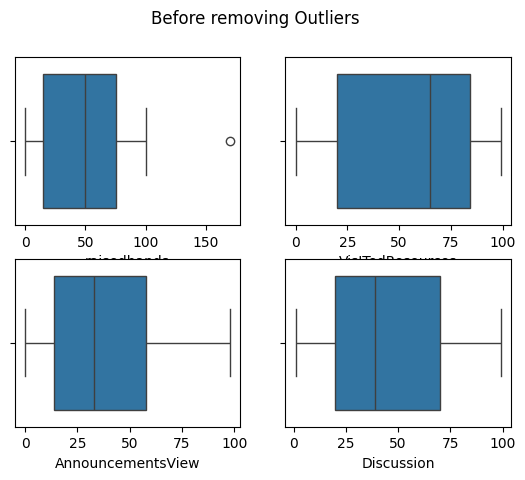

In [28]:
fig, axes = plt.subplots(2,2)
fig.suptitle('Before removing Outliers')
sns.boxplot(data = df, x ='raisedhands', ax=axes[0,0])
sns.boxplot(data = df, x ='VisITedResources', ax=axes[0,1])
sns.boxplot(data = df, x ='AnnouncementsView', ax=axes[1,0])
sns.boxplot(data = df, x ='Discussion', ax=axes[1,1])
plt.show()

In [31]:
df = DetectOutlier(df, 'raisedhands')


Highest allowed in variable: raisedhands 165.0
lowest allowed in variable: raisedhands -75.0
Outliers : 
 1


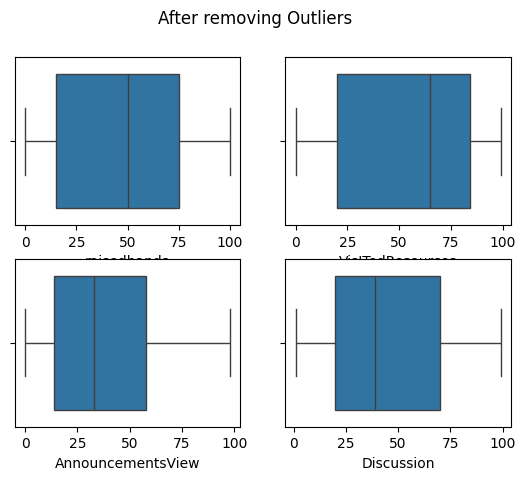

In [32]:
fig, axes = plt.subplots(2,2)
fig.suptitle('After removing Outliers')
sns.boxplot(data = df, x ='raisedhands', ax=axes[0,0])
sns.boxplot(data = df, x ='VisITedResources', ax=axes[0,1])
sns.boxplot(data = df, x ='AnnouncementsView', ax=axes[1,0])
sns.boxplot(data = df, x ='Discussion', ax=axes[1,1])
plt.show()


In [33]:
print('raisedhands: ', df['raisedhands'].skew())
print('VisITedResources: ', df['VisITedResources'].skew())
print('AnnouncementsView: ', df['AnnouncementsView'].skew())
print('Discussion: ', df['Discussion'].skew())


raisedhands:  0.028374079559687623
VisITedResources:  -0.3388404568312024
AnnouncementsView:  0.4021955128761278
Discussion:  0.3621541732143617


In [ ]:
# There are two types
# 1. Left skew
# 2. Right skew
# Formula to find out data skewness = 3*(mean-median)/std
# = 0 (no skew) print
# = negative (Negative skew) left skewed data
# = positve (Positive skew) Right skewed data
# = -0.5 to 0 to 0.5 (acceptable skew)
# = -0.5> <-1 moderate negative skew
# = 0.5> <1 moderate positive skew
# = > -1 high negative
# = > 1 high positive

<ipython-input-39-dd1c4ed2f229>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AnnouncementsView'] = yeojohnTr.fit_transform(df['AnnouncementsView'].values.reshape(-1,1))
<ipython-input-39-dd1c4ed2f229>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Discussion'] = yeojohnTr.fit_transform(df['Discussion'].values.reshape(-1,1))


---------------- Data Skew Values after Yeo John Transformation ----------------------
AnnouncementsView:  -0.1800377395845211
Discussion:  -0.13328782723929383


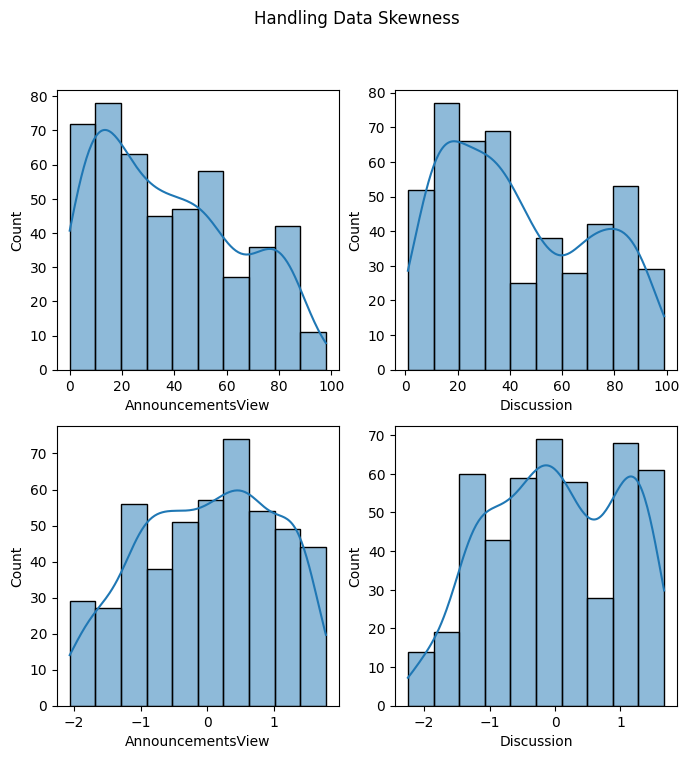

In [39]:
fig, axes = plt.subplots(2,2, figsize= (8,8))
fig.suptitle('Handling Data Skewness')
sns.histplot(ax = axes[0,0], data = df['AnnouncementsView'], kde=True)
sns.histplot(ax = axes[0,1], data = df['Discussion'], kde=True)

from sklearn.preprocessing import PowerTransformer
yeojohnTr = PowerTransformer(standardize=True)
df['AnnouncementsView'] = yeojohnTr.fit_transform(df['AnnouncementsView'].values.reshape(-1,1))
df['Discussion'] = yeojohnTr.fit_transform(df['Discussion'].values.reshape(-1,1))


print('---------------- Data Skew Values after Yeo John Transformation ----------------------')

print('AnnouncementsView: ', df['AnnouncementsView'].skew())
print('Discussion: ', df['Discussion'].skew())

sns.histplot(ax = axes[1,0], data = df['AnnouncementsView'], kde=True)
sns.histplot(ax = axes[1,1], data = df['Discussion'], kde=True)
plt.show()
